### Project 2: EDA 

In [2]:
library(readr)

data <- read.csv("data/crime.csv")
head(data)

,crime_rate,violent_crime_rate,police_funding,X25_plus_high_school,X16_19_no_high_school,X18_24_college,X25_plus_4_years_college
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,478,184,40,74,11,31,20
2,494,213,32,72,11,43,18
3,643,347,57,70,18,16,16
4,341,565,31,71,11,25,19
5,773,327,67,72,9,29,24
6,603,260,25,68,8,32,15


In [3]:
summary(data)
skimr::skim(data)

   crime_rate     violent_crime_rate police_funding  X25_plus_high_school
 Min.   : 341.0   Min.   :  29.0     Min.   :16.00   Min.   :42.0        
 1st Qu.: 497.0   1st Qu.: 230.8     1st Qu.:30.00   1st Qu.:49.0        
 Median : 654.5   Median : 454.0     Median :34.50   Median :59.0        
 Mean   : 718.0   Mean   : 616.2     Mean   :37.76   Mean   :58.8        
 3rd Qu.: 820.5   3rd Qu.: 822.5     3rd Qu.:42.25   3rd Qu.:67.0        
 Max.   :1740.0   Max.   :3545.0     Max.   :86.00   Max.   :81.0        
 X16_19_no_high_school X18_24_college  X25_plus_4_years_college
 Min.   : 4.0          Min.   : 7.00   Min.   : 8.00           
 1st Qu.:11.0          1st Qu.:21.25   1st Qu.:11.00           
 Median :14.0          Median :25.00   Median :12.00           
 Mean   :15.4          Mean   :29.90   Mean   :13.82           
 3rd Qu.:19.0          3rd Qu.:34.25   3rd Qu.:15.75           
 Max.   :34.0          Max.   :81.00   Max.   :36.00           

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             50    
Number of columns          7     
_______________________          
Column type frequency:           
  numeric                  7     
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable            n_missing complete_rate  mean     sd  p0   p25   p50
1 crime_rate                       0             1 718.  294.   341 497   654. 
2 violent_crime_rate               0             1 616.  574.    29 231.  454  
3 police_funding                   0             1  37.8  13.8   16  30    34.5
4 X25_plus_high_school             0             1  58.8   9.97  42  49    59  
5 X16_19_no_high_school            0             1  15.4   6.02   4  11    14  
6 X18_24_college                   0             1  29.9  14.8    7  21.2  25  
7 X25_plus_

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
"'length(x) = 12 > 1' in coercion to 'logical(1)'"


,skim_type,skim_variable,n_missing,complete_rate,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,numeric,crime_rate,0,1,717.96,293.938766,341,497.00,654.5,820.50,1740,▇▇▂▁▁
2,numeric,violent_crime_rate,0,1,616.18,573.739175,29,230.75,454.0,822.50,3545,▇▂▁▁▁
3,numeric,police_funding,0,1,37.76,13.820364,16,30.00,34.5,42.25,86,▃▇▁▁▁
4,numeric,X25_plus_high_school,0,1,58.80,9.965246,42,49.00,59.0,67.00,81,▇▆▆▇▁
5,numeric,X16_19_no_high_school,0,1,15.40,6.023762,4,11.00,14.0,19.00,34,▃▇▆▂▁
6,numeric,X18_24_college,0,1,29.90,14.801062,7,21.25,25.0,34.25,81,▃▇▂▁▁
7,numeric,X25_plus_4_years_college,0,1,13.82,5.157479,8,11.00,12.0,15.75,36,▇▃▁▁▁


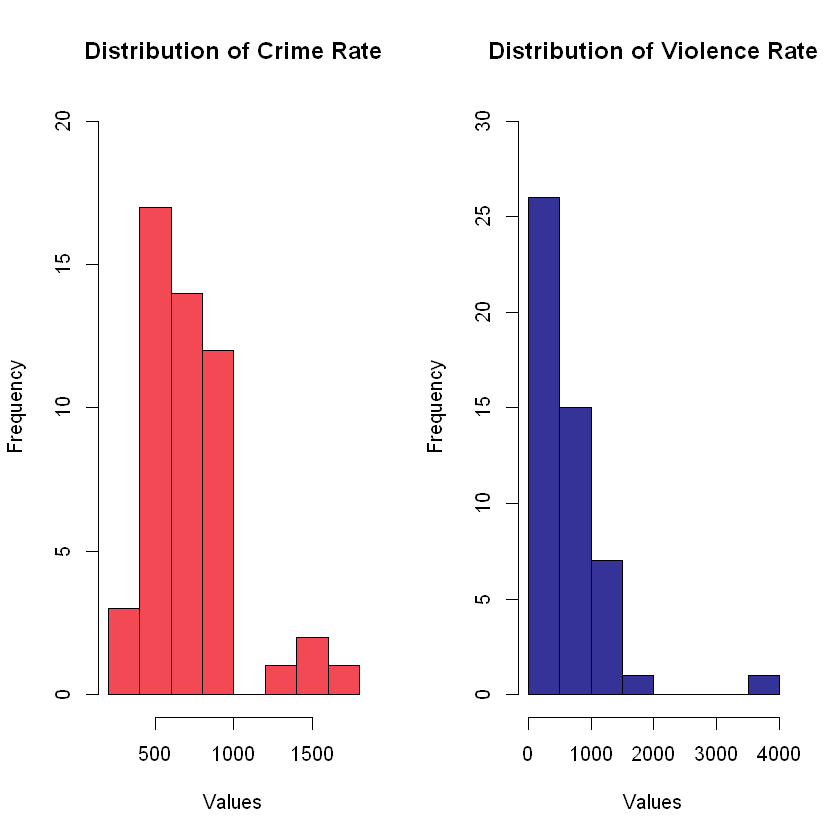

In [22]:
par(mfrow = c(1, 2))
hist(data$crime_rate, xlab = 'Values', ylim = c(0, 20), breaks = 'Freedman-Diaconis', col = '#f24954', main = "Distribution of Crime Rate")
hist(data$violent_crime_rate, xlab = 'Values', ylim = c(0, 30), breaks = 'Freedman-Diaconis', col = '#353397', main = "Distribution of Violence Rate")

Upon examining the distribution of each variable, it appears that most of them can be well approximated by a normal distribution, except for the violent crime rate variable, which exhibits a long tail to the right due to the presence of outliers. This may suggest that the violent crime rate variable follows a gamma distribution.

In [24]:
shapiro.test(data$crime_rate)


	Shapiro-Wilk normality test

data:  data$crime_rate
W = 0.86519, p-value = 4.095e-05


Based on the results of the Shapiro-Wilk test, it was determined that the variables are not normally distributed and the null hypothesis of normality was rejected at a significance level of less than 1%.

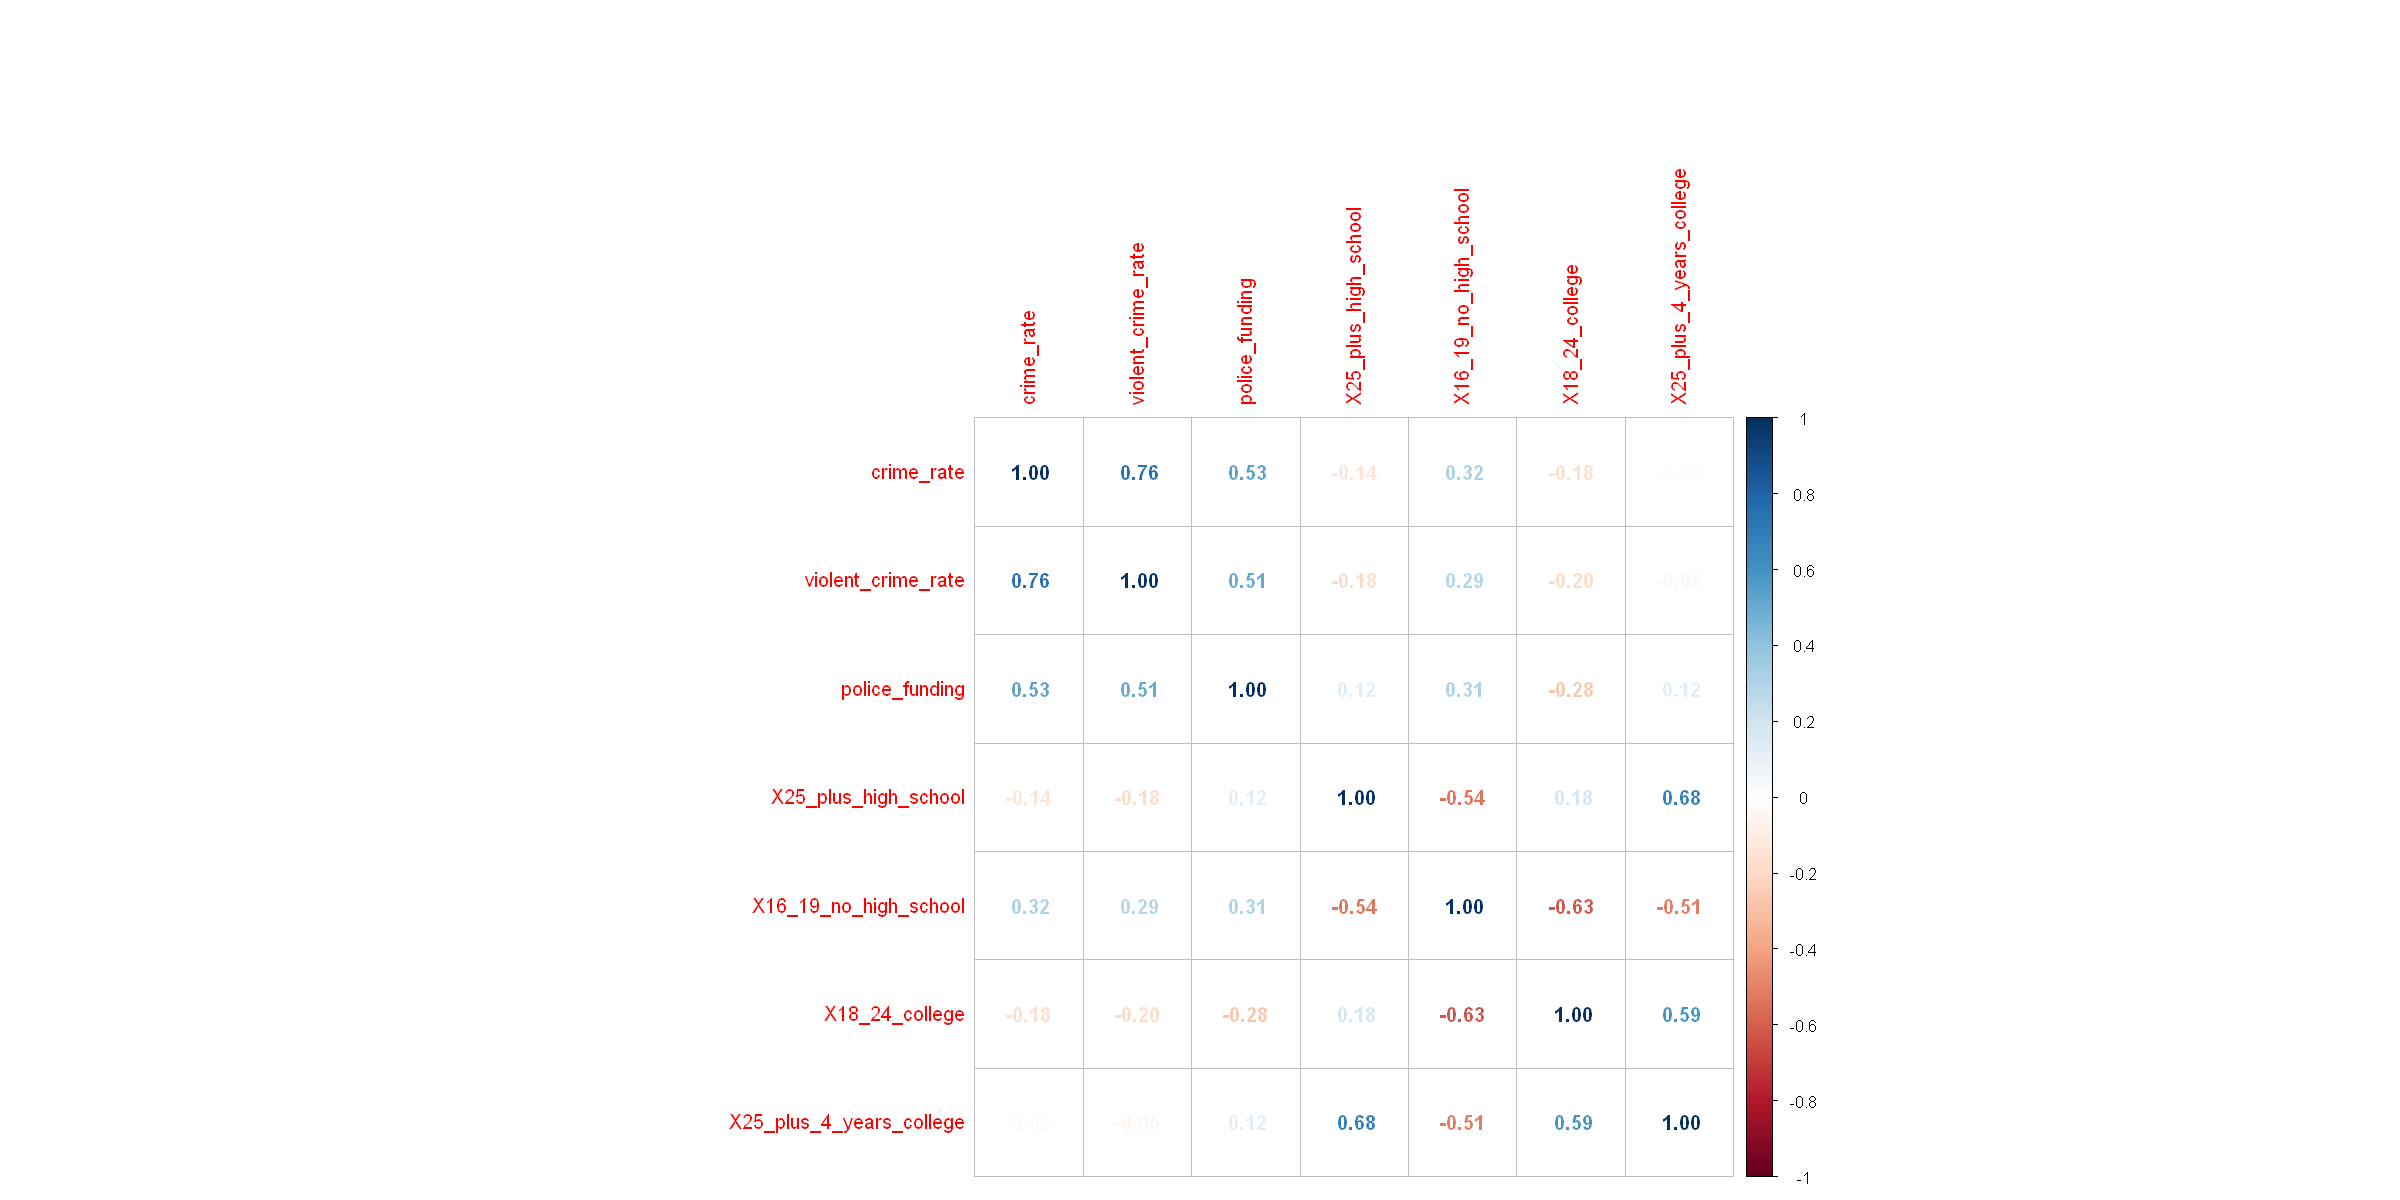

In [ ]:
podn <- cor(data)

corrplot(podn, method = 'number')

The correlation matrix revealed two groups of variables: the first group includes the two target variables, namely crime and violent crime rate and policy funding,
which were moderately to highly positively correlated. The second group included four variables reflecting educational status, which were moderately correlated with each other. Given the variable relationships described and to mitigate the negative effects of multicollinearity, I decided to select only three variables for predicting both target variables. These variables include police funding, the percentage of pupils aged 16-19 without a high school education, and the percentage of pupils aged 25 and above with a high school education. The latter variable is negatively correlated with the target variables, while the percentage of pupils without a high school education is positively
correlated.

`geom_smooth()` using formula = 'y ~ x'


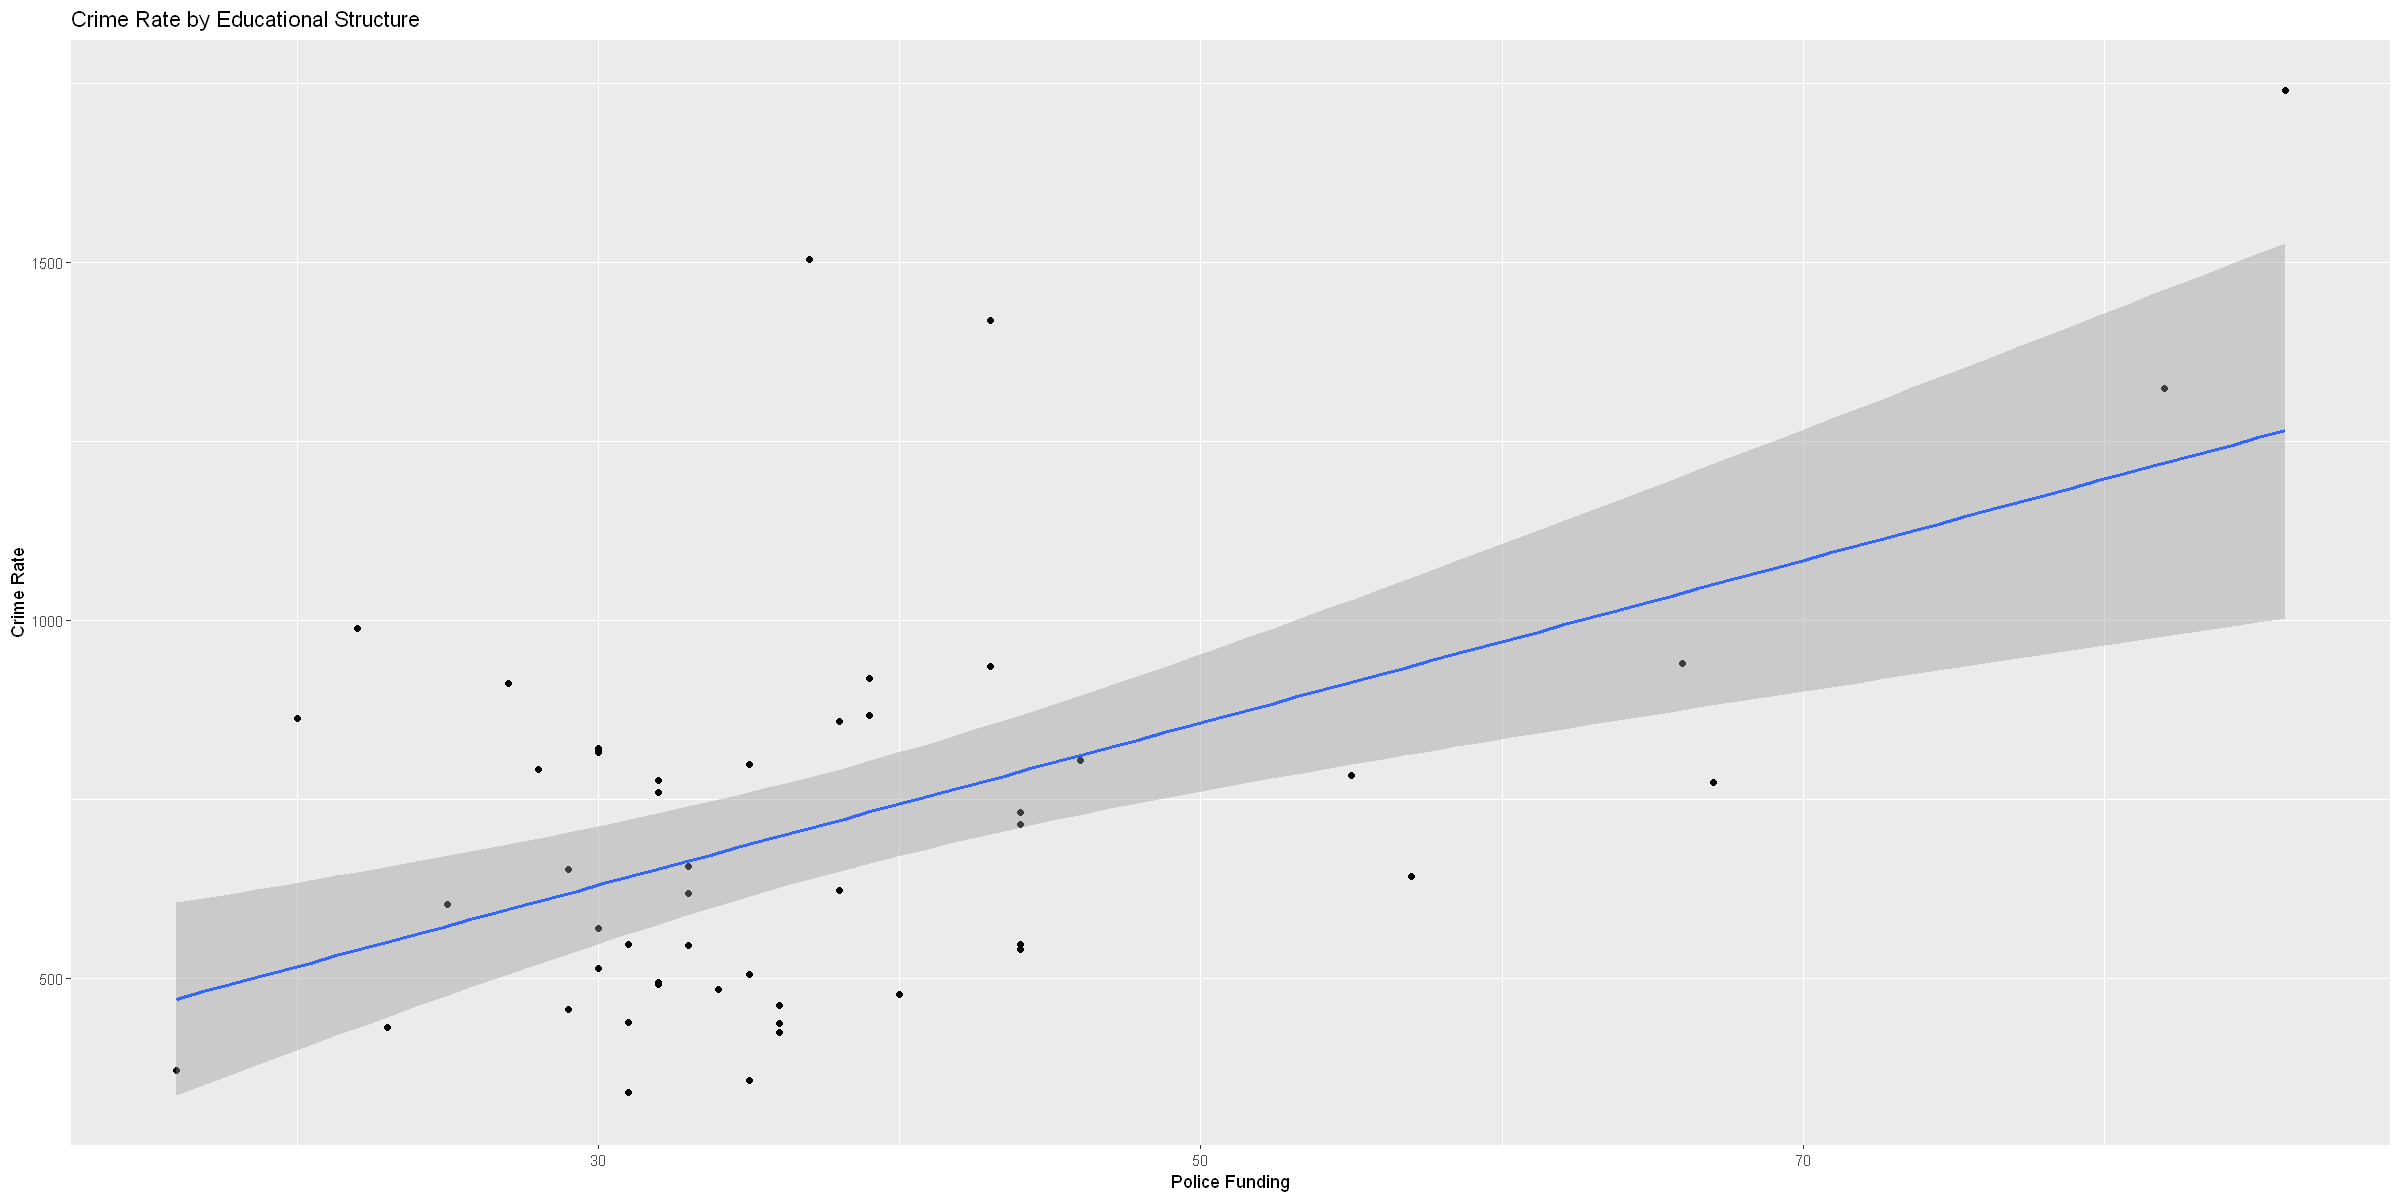

In [ ]:
library(ggplot2)


ggplot(data, aes(x = police_funding, y = crime_rate)) +
  geom_point() +
  geom_smooth(method = 'lm') +
  ylab("Crime Rate") +
  xlab("Police Funding") +
  ggtitle("Crime Rate by Educational Structure") +
  theme(legend.position = "none")


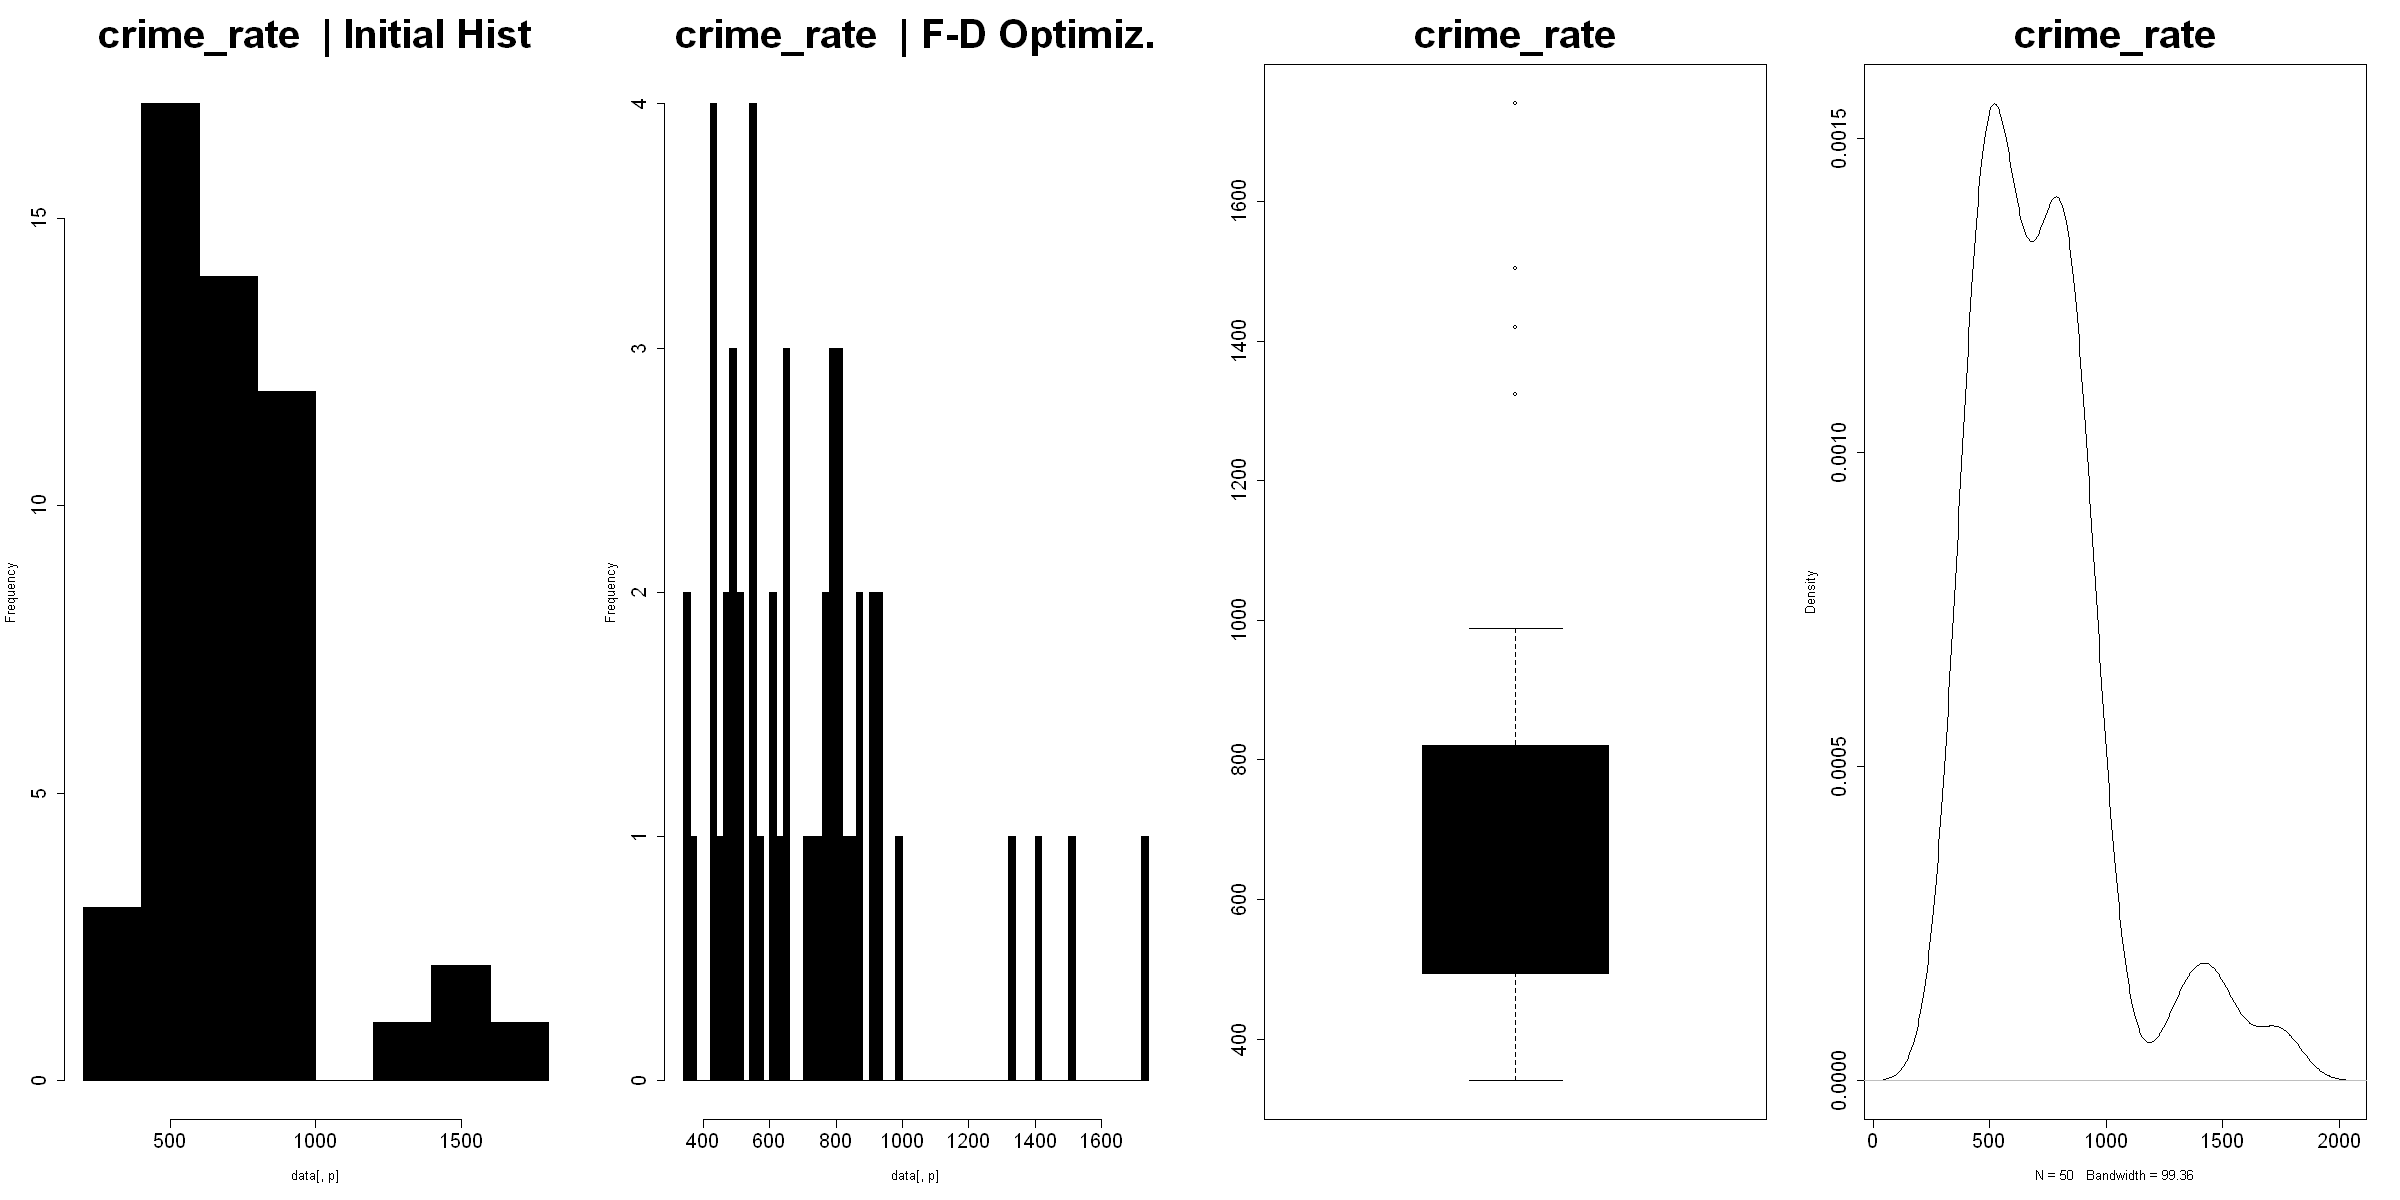

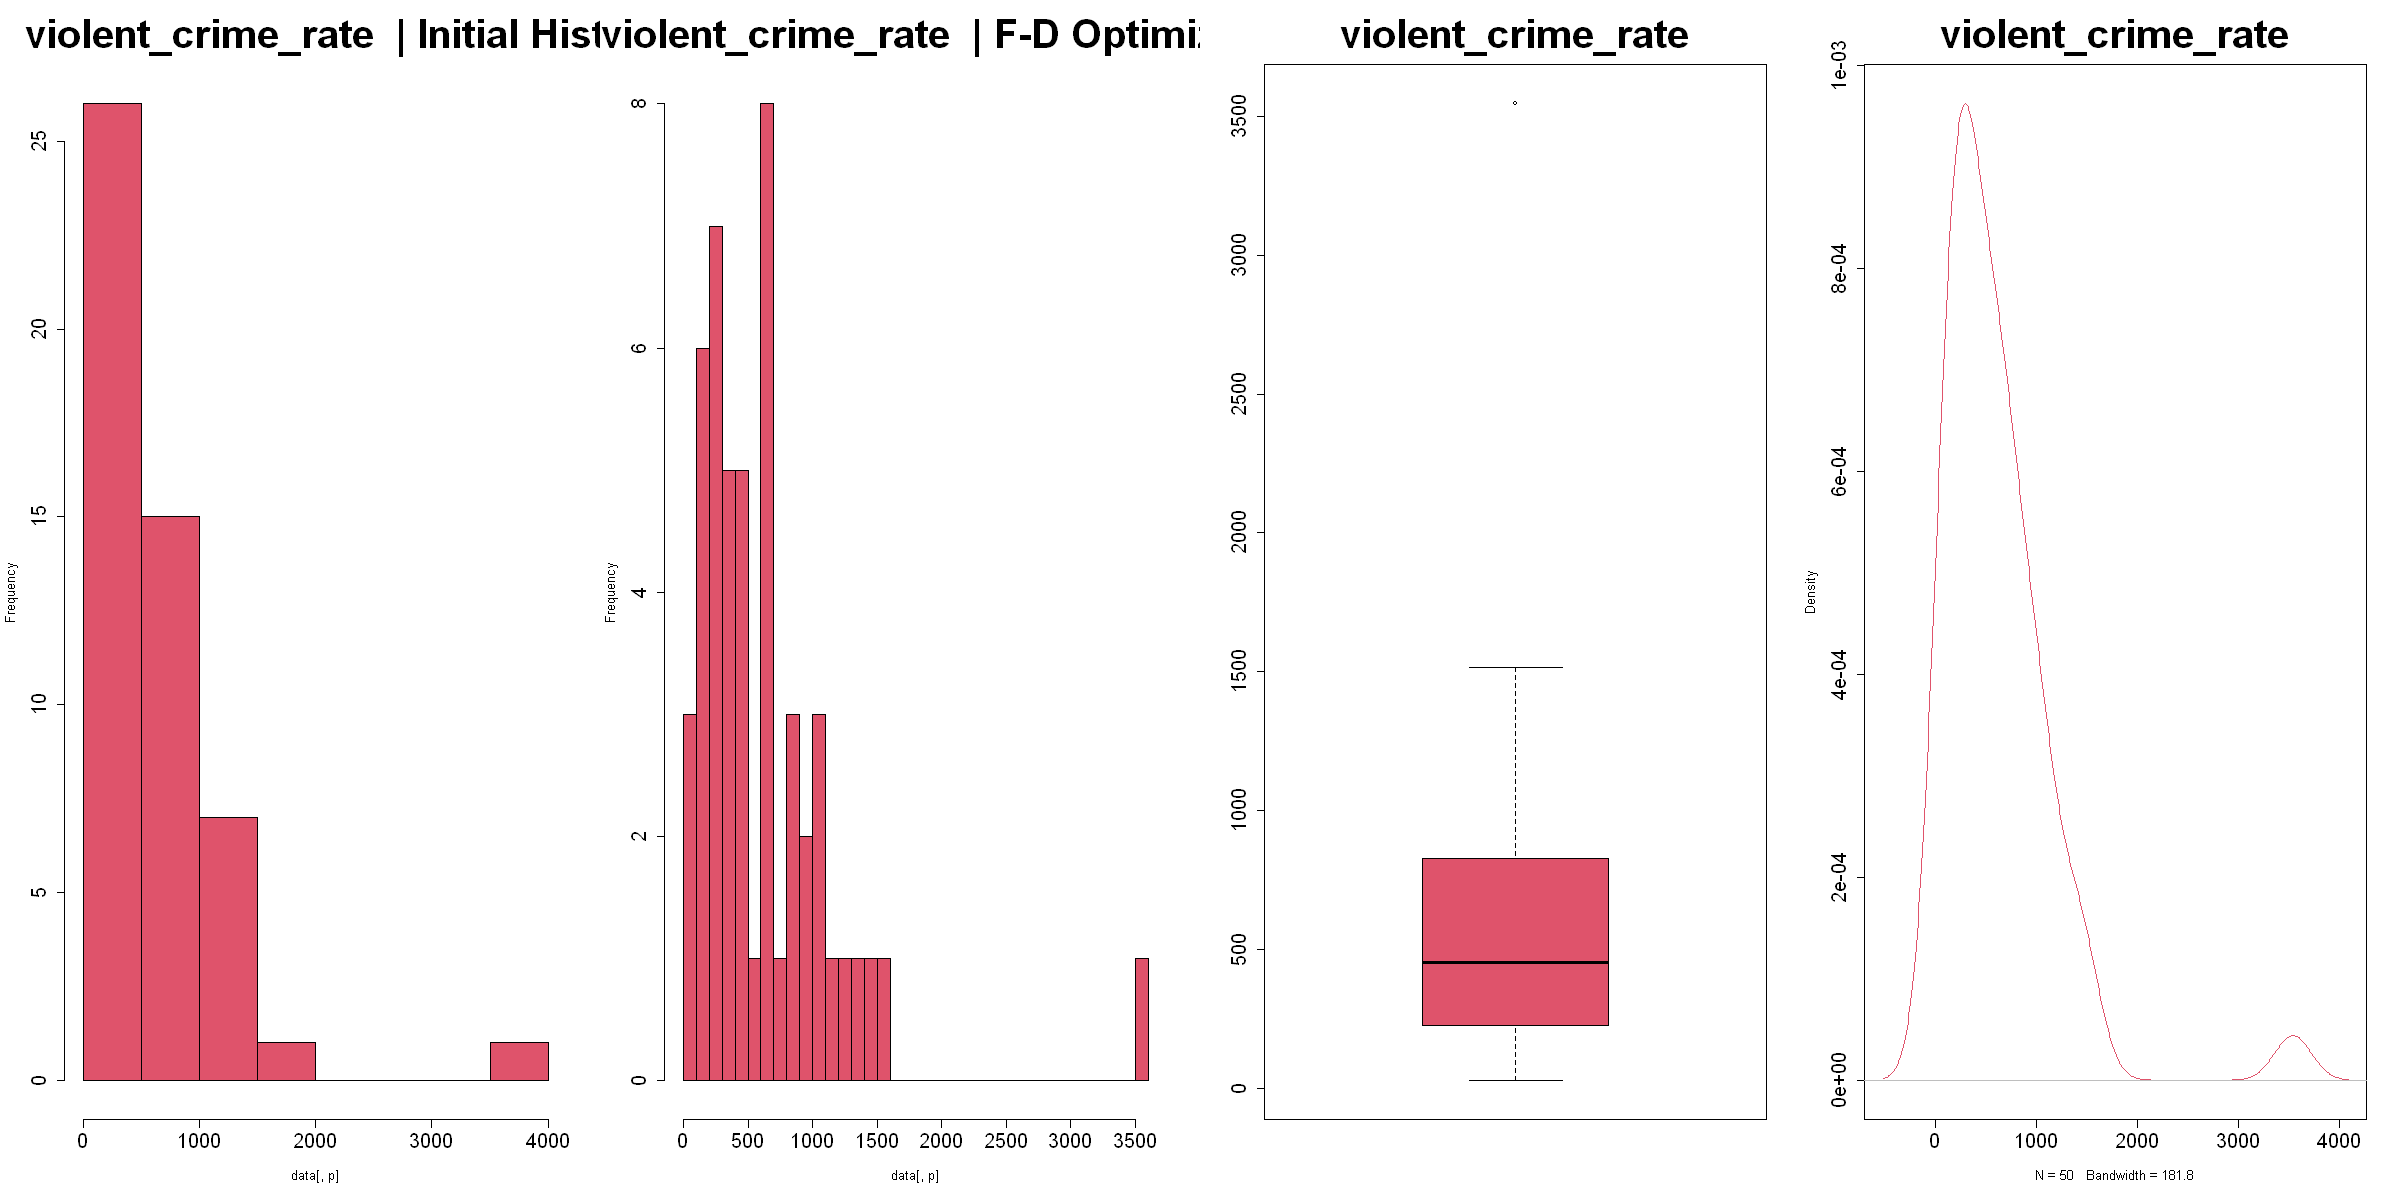

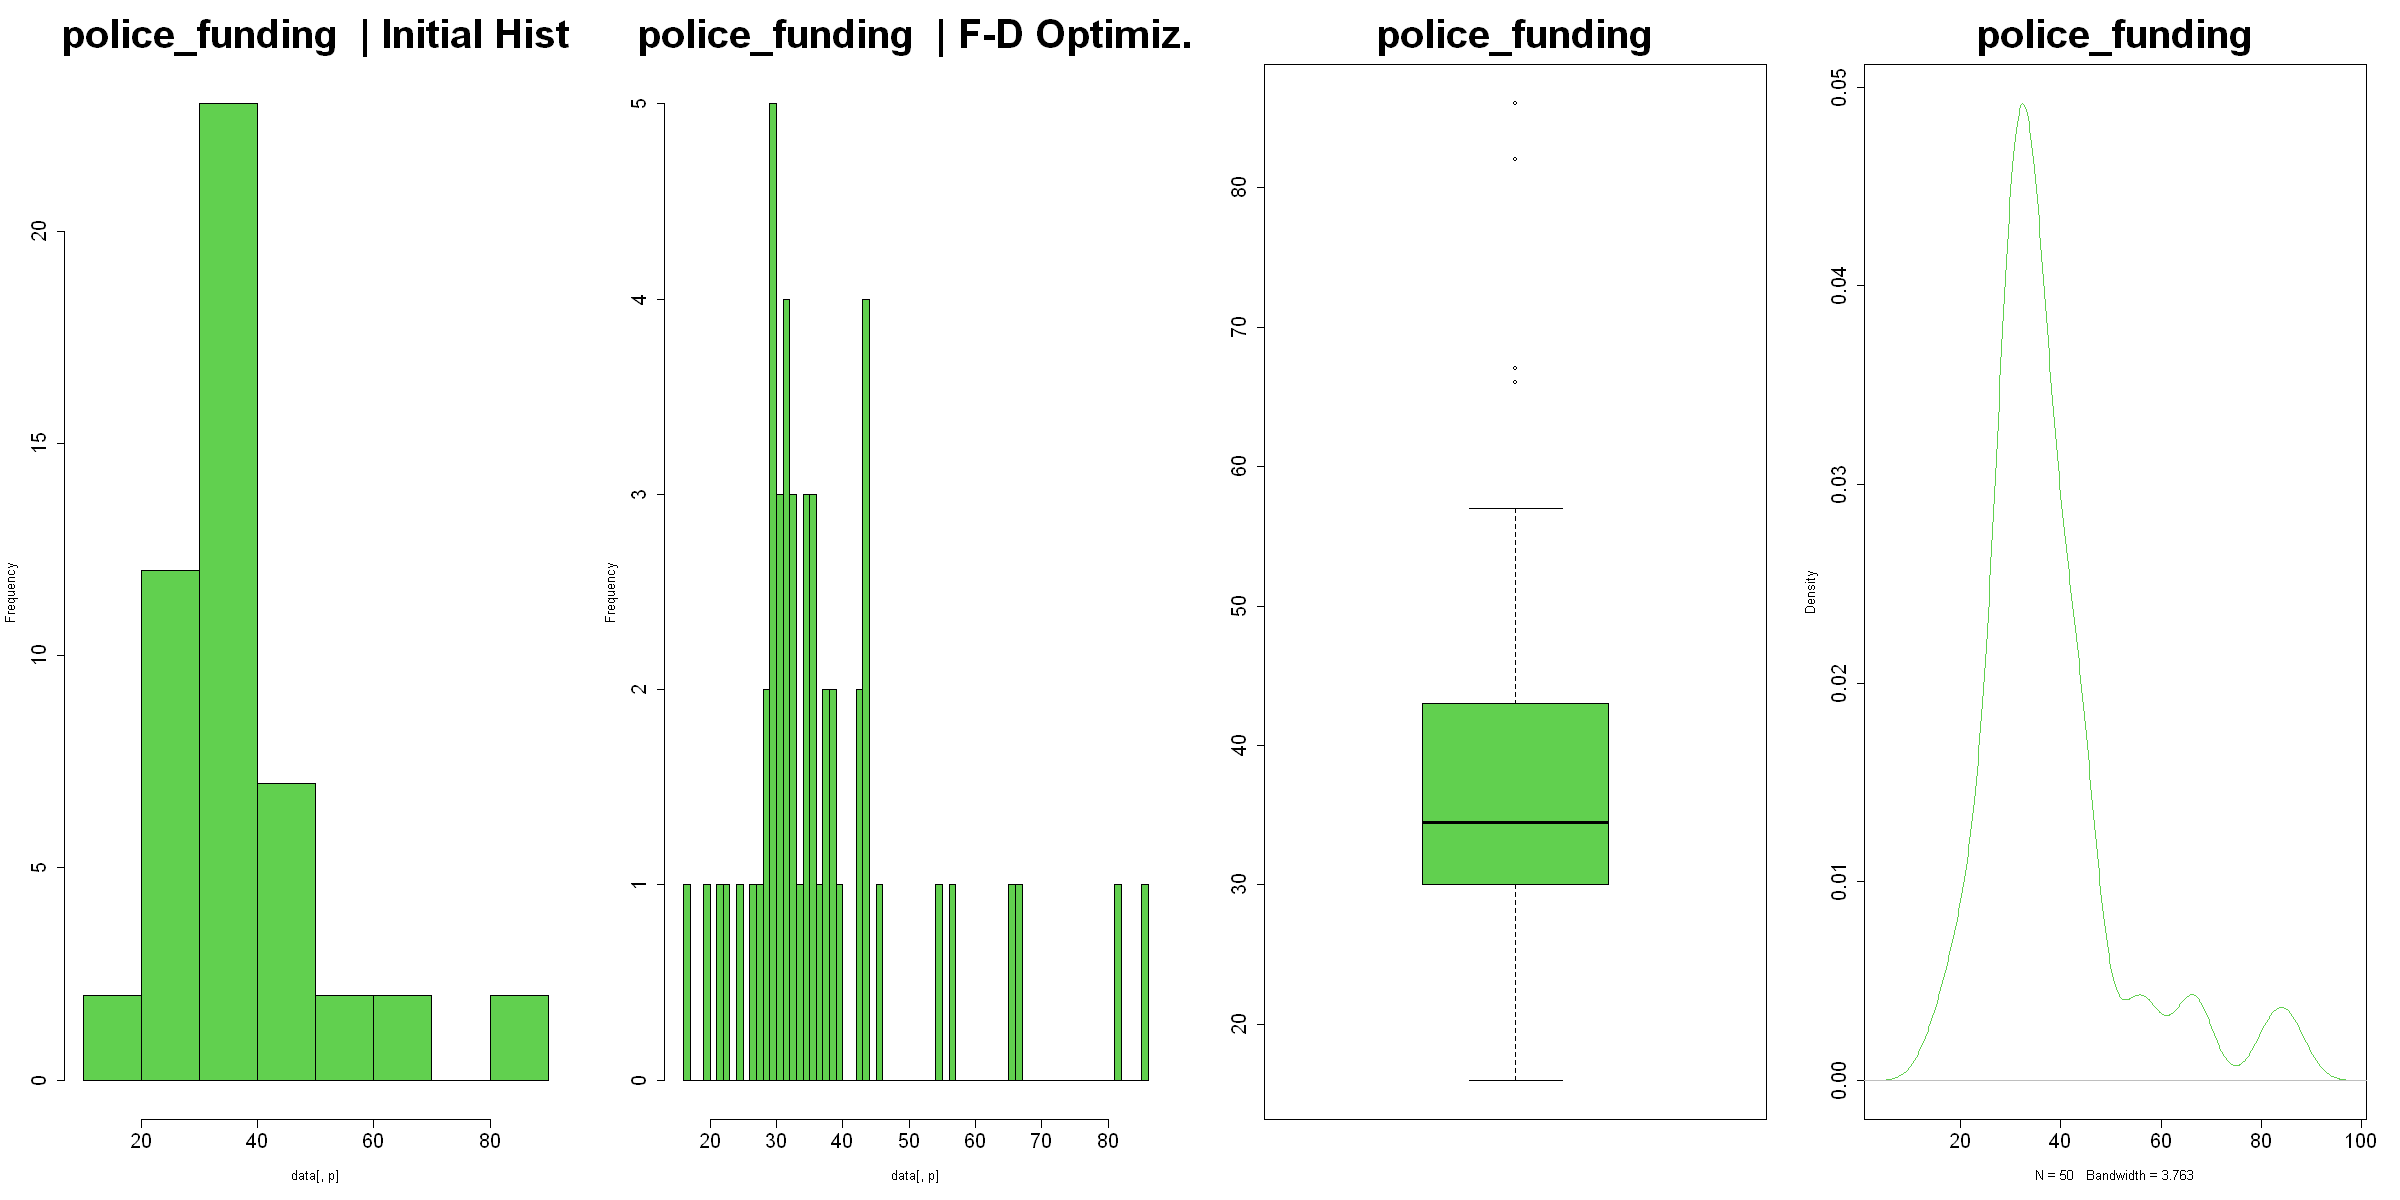

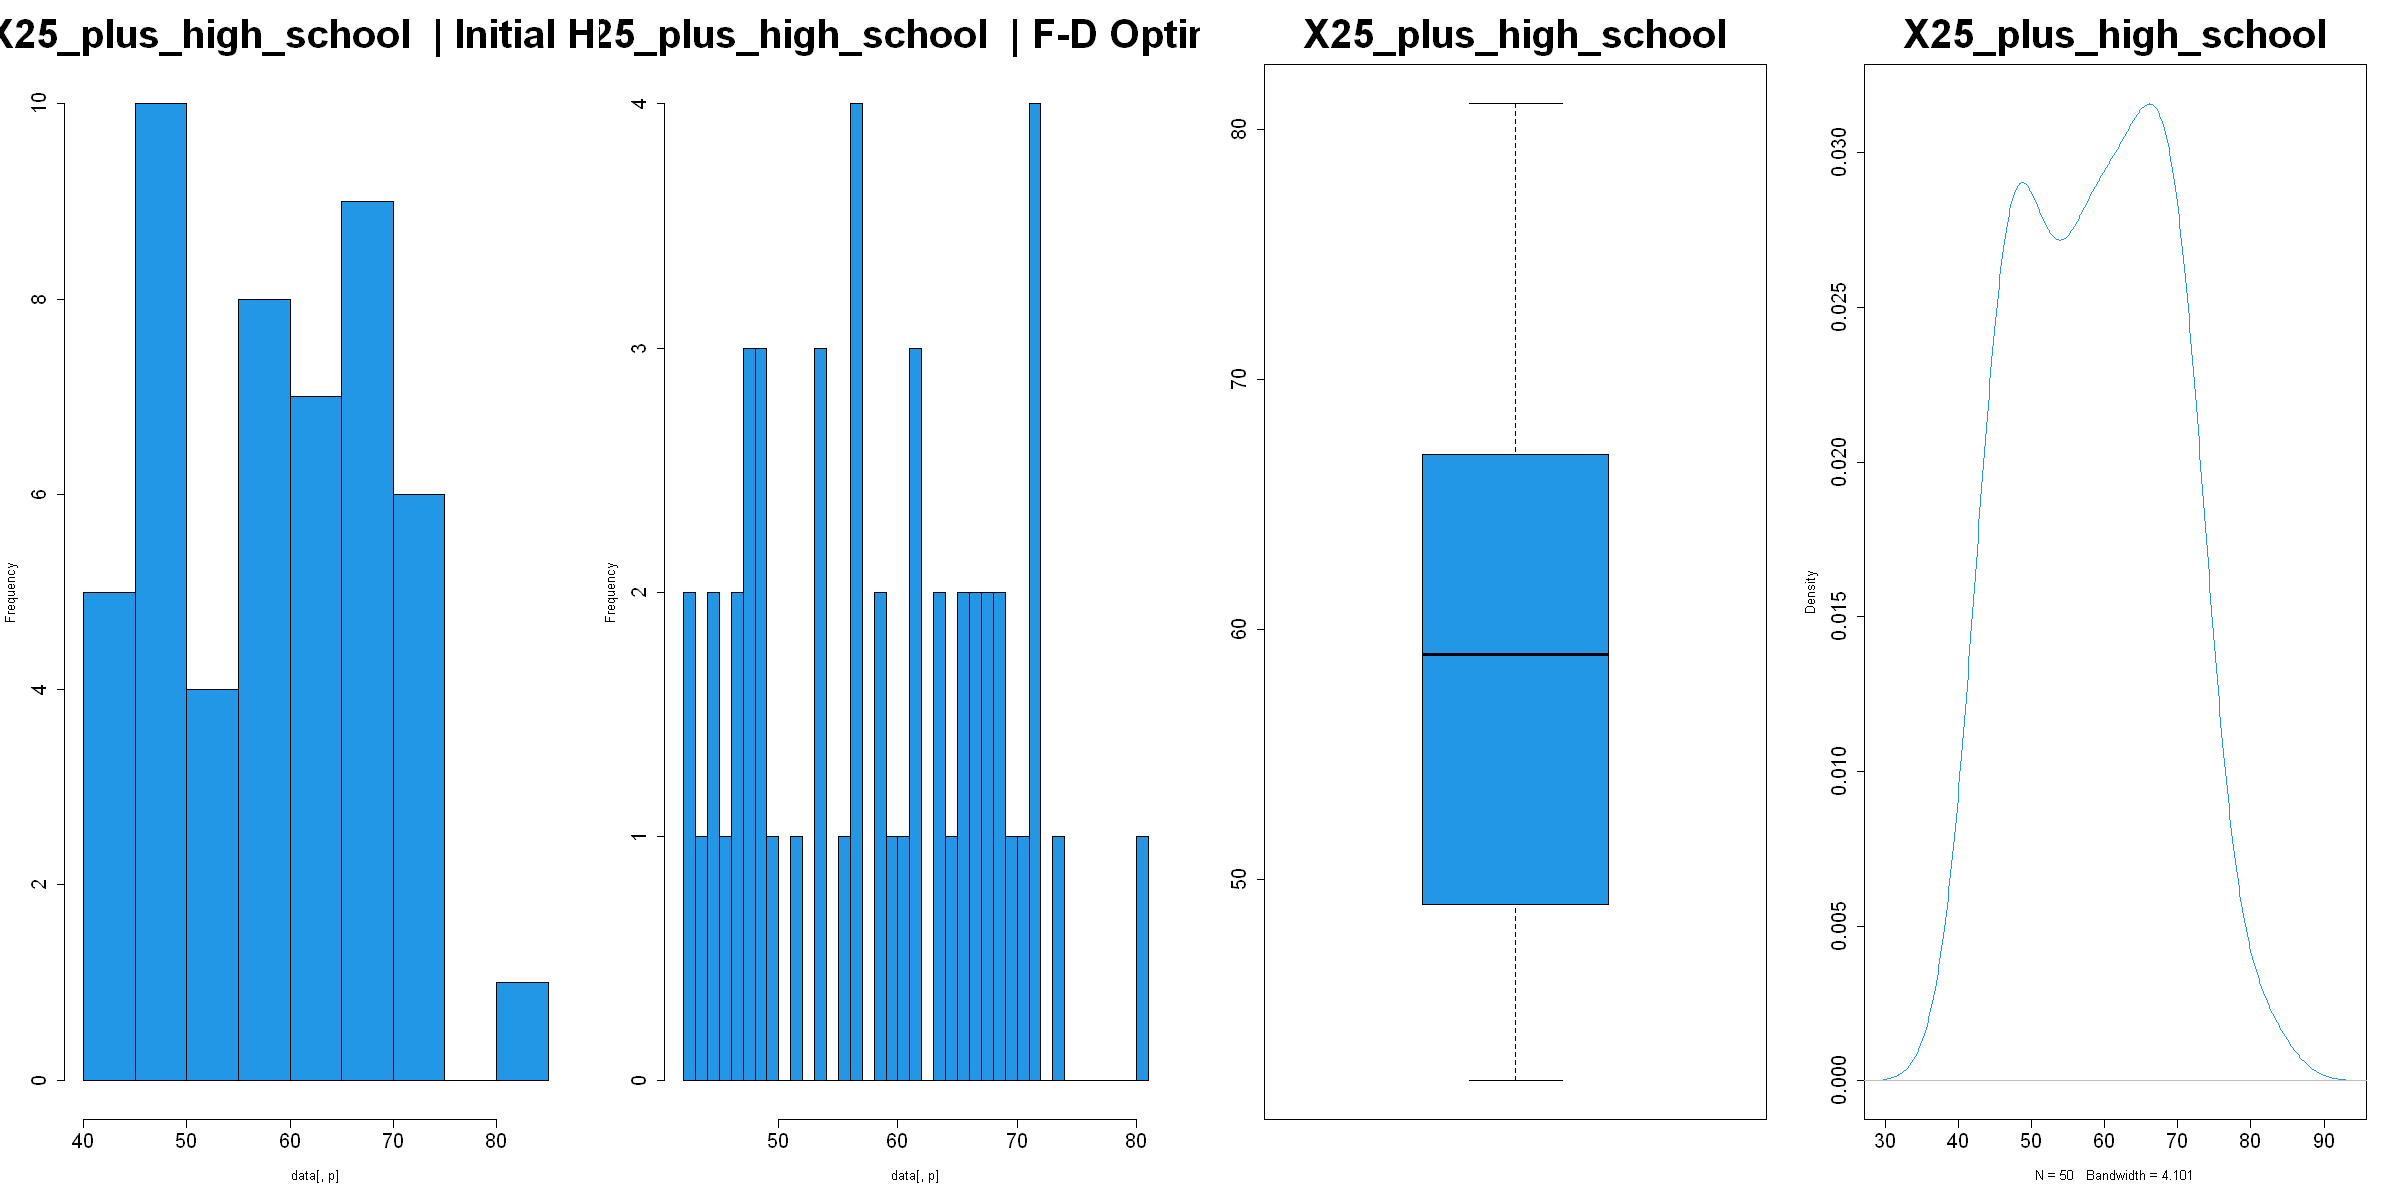

null device 
          1

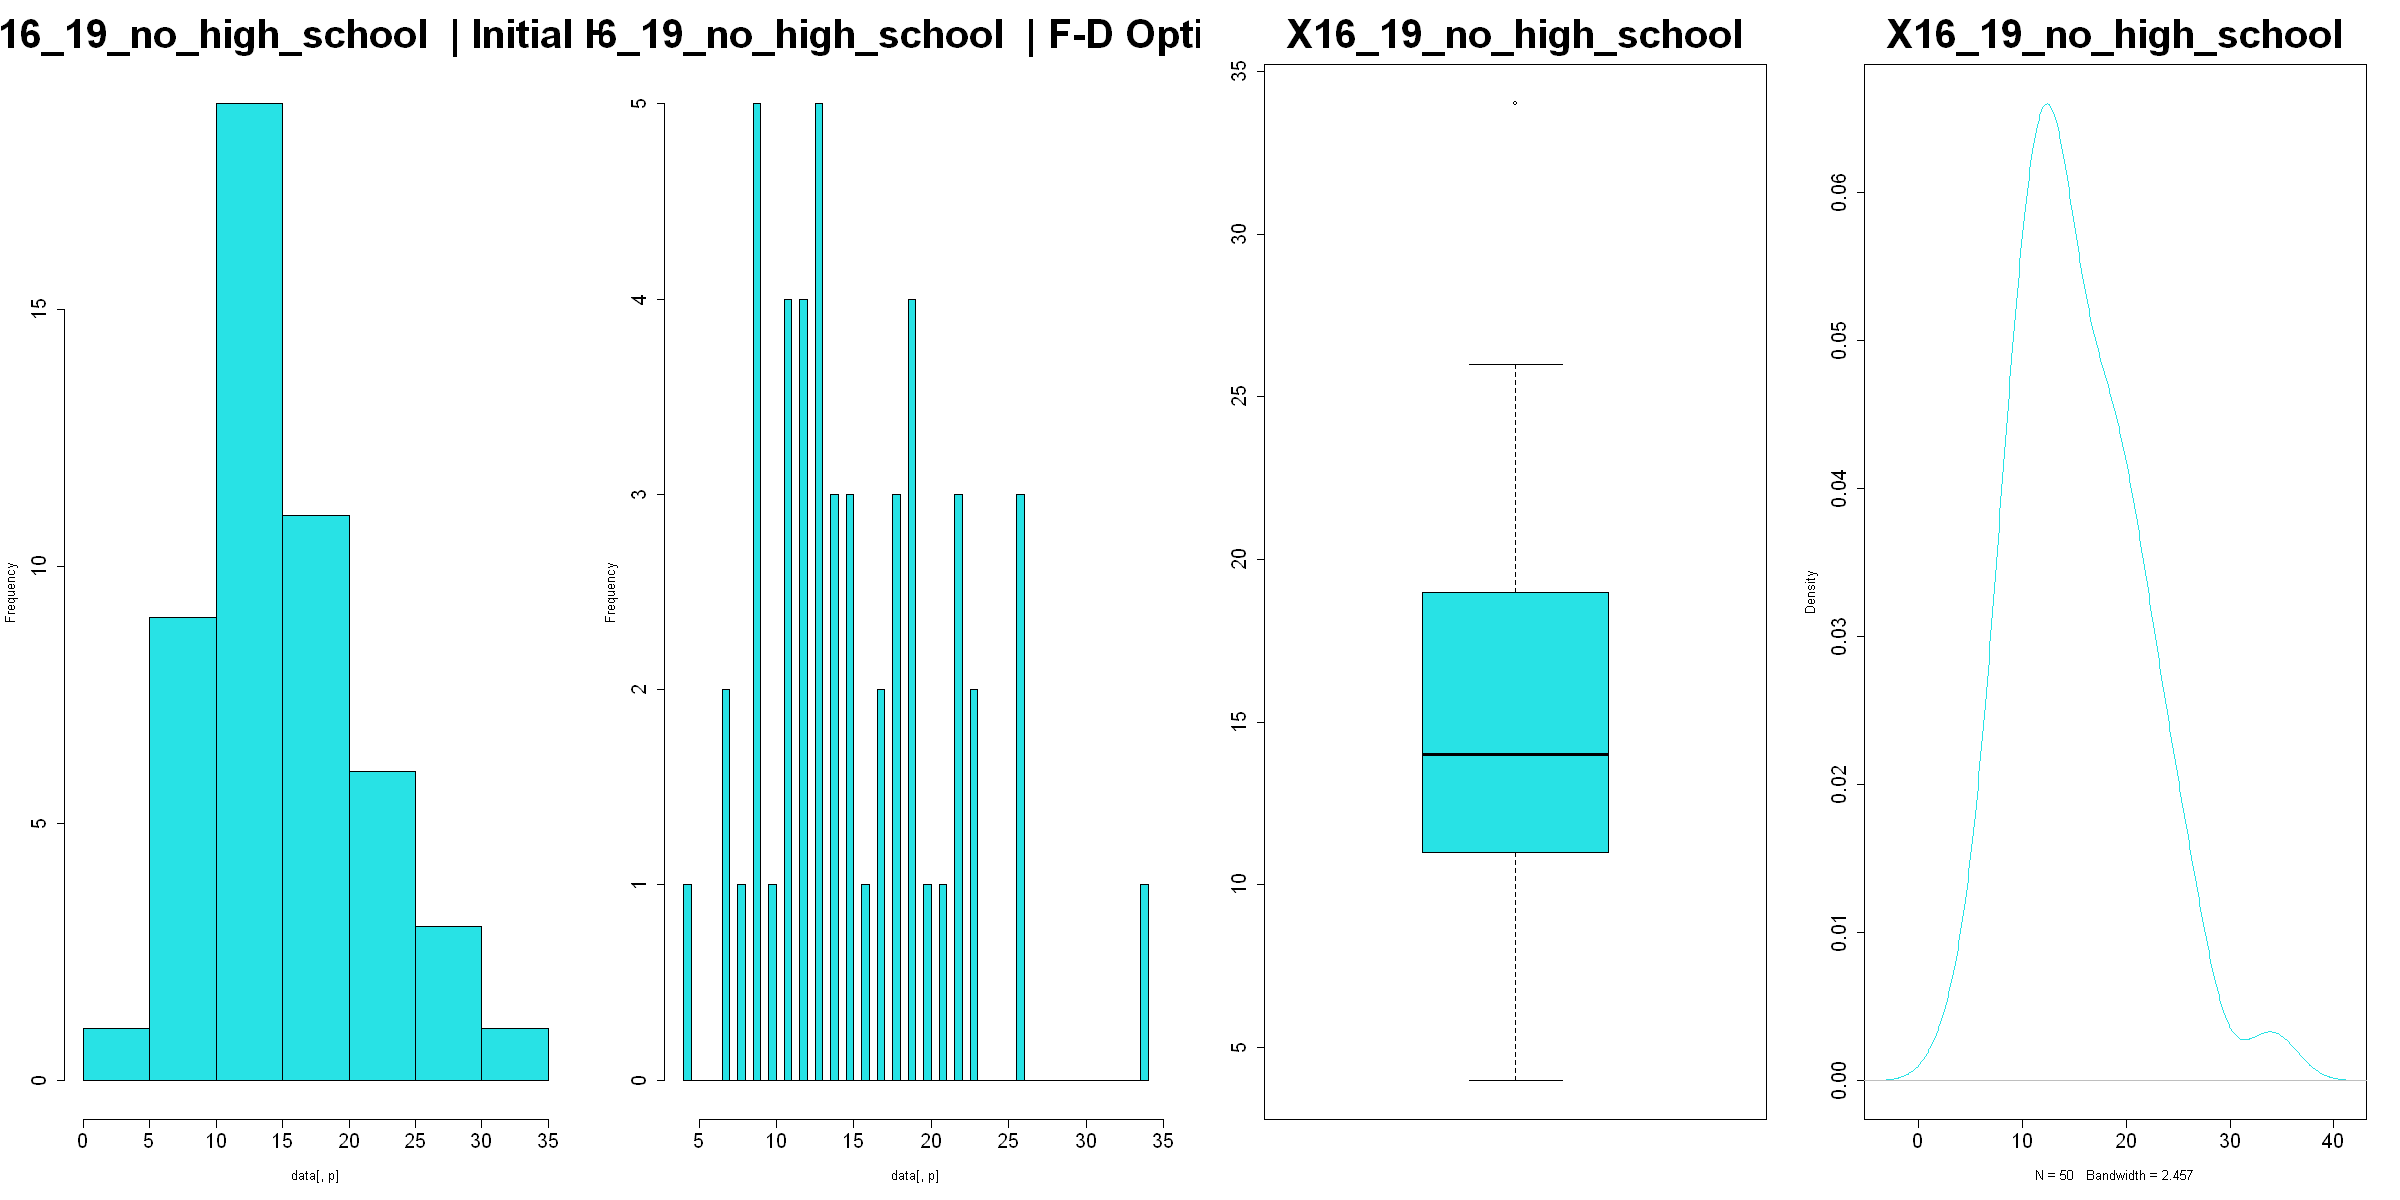

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)
par(mfrow = c(1,4), cex.main = 3, cex.axis = 1.5)
for (p in 1:5){
    hist(data[,p], main = paste(names(data)[p], " | Initial Hist"), col = p)
    hist(data[,p], main = paste(names(data)[p], " | F-D Optimiz."), col = p, breaks = 50)
    boxplot(data[,p], main = names(data)[p], col = p)
    plot(density(data[,p]), main = names(data)[p], col = p)
}

dev.off()